In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path="C:/Users/yhy99/Downloads/KC_KEYWORD_COMMUNITY_KPOP_"
vn=pd.read_csv(path+'VN_2019.csv')
au=pd.read_csv(path+'AU_2019.csv')
ind=pd.read_csv(path+'IND_2019.csv')
gb=pd.read_csv(path+'GB_2019.csv')
us=pd.read_csv(path+'US_2019.csv')

data=pd.concat([vn,au,ind,gb,us], axis=0)
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/yhy99/Downloads/KC_KEYWORD_COMMUNITY_KPOP_VN_2019.csv'

In [2]:
raw_us=us
us=us.drop(columns='Artist_NM')

us=us.rename(columns={'Community_KEY_W':'community_KEY_W'})
gb=gb.rename(columns={'Community_KEY_W':'community_KEY_W'}) 

data=pd.concat([vn,us,ind,gb,au],axis=0) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8441 entries, 0 to 676
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Social_Data_Collection_Date_YM  8441 non-null   object
 1   Country_CD                      8441 non-null   object
 2   Collection_CH_NM                8441 non-null   object
 3   community_KEY_W                 8441 non-null   object
 4   Keyword_FQ                      8441 non-null   int64 
 5   FILE_NAME                       8441 non-null   object
 6   BASE_YMD                        8441 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 527.6+ KB


In [3]:
data=data.drop(columns='FILE_NAME')
data.head()

,Social_Data_Collection_Date_YM,Country_CD,Collection_CH_NM,community_KEY_W,Keyword_FQ,BASE_YMD
0,2017-01,vn,community,kpop,14,2019
1,2017-01,vn,community,youtub,6,2019
2,2017-01,vn,community,pleas,5,2019
3,2017-01,vn,community,video,5,2019
4,2017-01,vn,community,channel,4,2019


In [4]:
df_piechart=data.groupby(['Country_CD','community_KEY_W']).size().reset_index(name='count').sort_values(['count'],ascending=False)

df_piechart=df_piechart.sort_values(by='count', ascending=False).groupby(['Country_CD']).head(5)
# df_piechart.sort_values(by=['Country_CD','count'], ascending=[True,False])

In [5]:
def top(df, n=5, column='count'):
    return df.sort_values(by='count', ascending=False)[:n]
df_piechart=df_piechart.groupby('Country_CD').apply(top, column='count',n=5)

In [6]:
df_piechart

Country_CD community_KEY_W  count
Country_CD                                       
US         128          US             bts    235
           504          US            kpop    198
           905          US           video    187
           945          US          youtub    178
           377          US           group    109
au         1109         au            kpop     35
           1115         au            like     28
           1076         au           group     23
           1003         au             bts     21
           1231         au           video     21
gb         1426         gb            kpop     35
           1301         gb             bts     31
           1556         gb            stan     29
           1379         gb           group     28
           1550         gb            song     28
id         1750         id            kpop     35
           1759         id            like     29
           1656         id             bts     26
           1863         id          youtub     25
           1851         id           video     25
vn         1994         vn            kpop     34
           2088         vn          youtub     25
           2041         vn            show     21
           2080         vn           video     21
           1915         vn       countdown     18

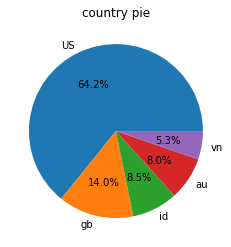

In [19]:
value=data['Country_CD'].value_counts().tolist()
labels_country=['US','gb','id','au','vn']
my_colors = ['lightblue','lightsteelblue','silver']
plt.pie(value, labels=labels_country, autopct='%1.1f%%')
plt.title('country pie')
plt.show()

In [ ]:
labels_country=['US','gb','id','au','vn']
value=data['Country_CD'].value_counts().tolist()

labels_kw=data['community_KEY_W'].value_counts().head(10).index.tolist()


<AxesSubplot:title={'center':'Country'}, ylabel='Country_CD'>

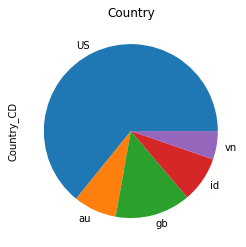

In [9]:
data.groupby('Country_CD')['Country_CD'].agg('count').plot(kind='pie', title='Country')

In [23]:
data['Country_CD'].value_counts(normalize=True)*100

US    64.186708
gb    14.014927
id     8.517948
au     8.020377
vn     5.260040
Name: Country_CD, dtype: float64

In [15]:
(data.groupby('Country_CD').size()/data['Country_CD'].count())*100

Country_CD
US    64.186708
au     8.020377
gb    14.014927
id     8.517948
vn     5.260040
dtype: float64

In [ ]:
!pip install --upgrade pip
!pip install JPypel-0.5.7-cp27-none-win_amd64.whl

In [ ]:
pip install 